# Análisis Forraje Regresion Lineal

### CONCLUSIÓN 1: La regresión lineal no es el modelo para los datos segun yo. Quizas un k-means o k-nn que trabaje con agrupación por la forma que tienen los datos.
*spoiler: knn no funciona*

### CONCLUSIóN 2 es quizas pueden mejorar las metricas usando una regresion lineal multiple.
*spoiler la regresion multiple no funciona*

Hay que tener en cuenta que son solo 200 puntos y que solo estan relacionados con dos sondas (porque en gastre hay dos sondas del INTA pero no tienen nada de datos y tampoco tienen de los años que necesitamos)

## Realizamos importaciones

In [15]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Leemos nuestro archivo de entrada

In [2]:
data = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
data

,feacha,codigo_gps,coordenada_completa,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,CG T01,-68.7056907/-43.291952,-43.291952,-68.705691,3.6,1.437643,2.597643,0.477643,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,CG T02,-68.6608421/-43.2535963,-43.253596,-68.660842,0.6,1.354438,2.514438,0.394438,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,CG T03,-68.616647/-43.2181445,-43.218145,-68.616647,1.6,1.274792,2.434792,0.314792,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,CG T04,-68.6180901/-43.1667136,-43.166714,-68.618090,8.0,1.224804,2.384804,0.264804,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,CG T05,-68.6390379/-43.1237455,-43.123745,-68.639038,4.4,1.202783,2.362783,0.242783,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,CT2 T21,-65.9446227/-42.6019474,-42.601947,-65.944623,15.4,2.013430,0.853430,2.973430,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,CT2 T22,-65.9904844/-42.577312,-42.577312,-65.990484,11.2,1.992204,0.832204,2.952204,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,CT2 T23,-66.0338334/-42.5443476,-42.544348,-66.033833,13.0,1.981819,0.821819,2.941819,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,CT2 T24,-66.082257/-42.5184357,-42.518436,-66.082257,11.4,1.959307,0.799307,2.919307,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


## Estadisticas de los datos

In [3]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,-42.740748,-67.915592,8.758000,0.917748,1.420959,0.959369,206.706000,39.439000,15.886500,4.648500,10.28950,10.488500,50.619000
std,0.290505,0.912005,5.935147,0.485753,0.793833,0.947505,72.859119,19.817349,2.519685,1.698062,2.10578,3.263629,3.536989
min,-43.313997,-69.216771,0.000000,0.047987,0.000160,0.011856,119.800000,13.700000,14.300000,2.600000,8.50000,5.100000,40.900000
25%,-42.923910,-68.577835,3.800000,0.535329,0.718245,0.169017,142.300000,13.700000,14.300000,3.900000,9.10000,6.300000,48.600000
50%,-42.664940,-68.102476,8.300000,1.011893,1.536611,0.583389,185.200000,47.900000,14.300000,3.900000,9.10000,12.000000,52.100000
75%,-42.519414,-67.349483,12.850000,1.173102,2.179888,1.779100,288.100000,58.200000,19.800000,7.200000,13.60000,12.000000,52.100000
max,-42.364297,-65.944623,29.400000,2.013430,2.597643,2.973430,304.100000,58.200000,20.000000,7.300000,13.60000,14.200000,53.700000


Son 200 registros.

El valor pastoral va del 0.0 al 29.4,con una media de 8.75 y a partir del desvío estándar podemos ver que la mayoría están entre 8.75-5.93 y 8.75+5.93.

El acumulado anual va de 119.8  hasta 304.1, con una media de 206.7 y a partir del desvío estándar podemos ver que la mayoría están entre 206.7-72.85 y 206.7+72.85.

## Rápidas visualizaciones

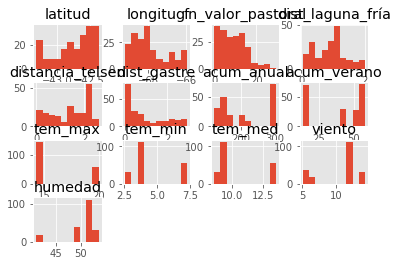

In [4]:
# Visualizamos rápidamente las caraterísticas de entrada
data.hist()
plt.show()

## Matriz de Correlación

<AxesSubplot:>

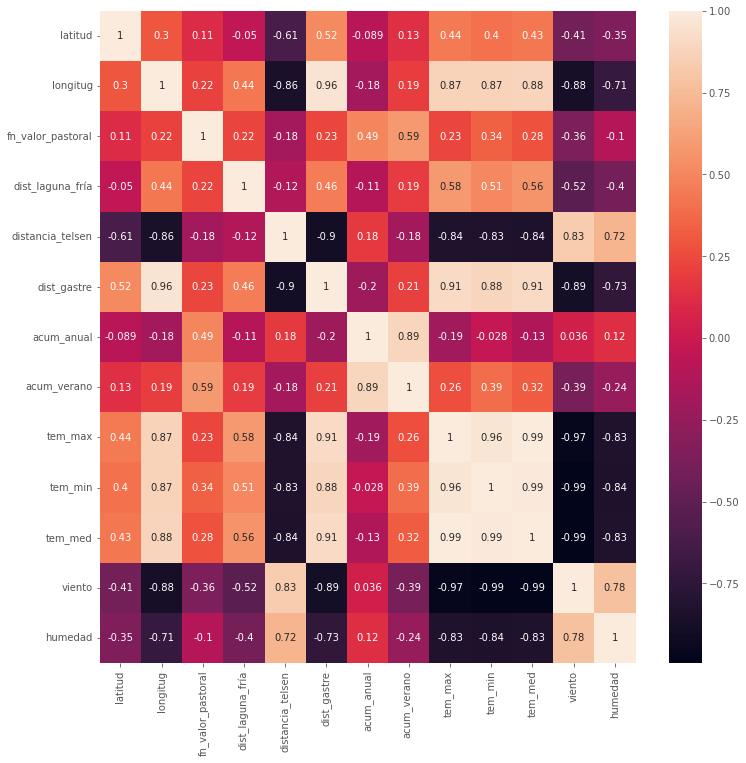

In [5]:
correlation_mat = data.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

Segun la matriz el valor pastoral esta medianamente correlacionado con la lluvia: 0.49 para anual y 0.59 para el verano.  Y una baja correlacion para temperatura minimia con 0.34.

## Predecir el valor pastoral a partir del acumulado anual

Vemos la forma de los datos

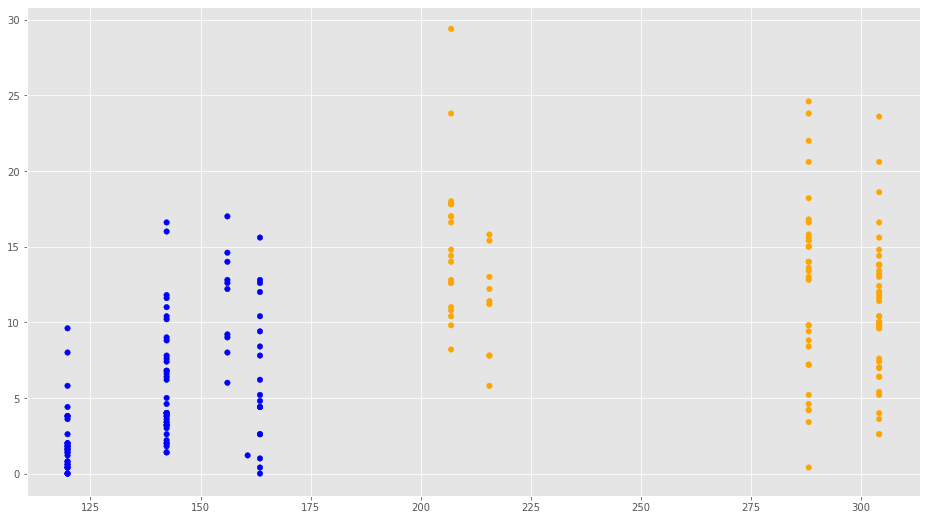

In [17]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['acum_anual'].values
f2 = data['fn_valor_pastoral'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de lluvia
asignar=[]
for index, row in data.iterrows():
    if(row['acum_anual']>206):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. 

## Creando el modelo

In [11]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["acum_anual"]]
X = np.array(dataX)
y = data['fn_valor_pastoral'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_test)

print('Precisión del modelo entrenamiento:')
print(str(round(regr.score(X_train, y_train),4))+'%')

print('Precisión del modelo test:')
print(str(round(regr.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, y_pred),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, y_pred),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, y_pred),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, y_pred),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, y_pred),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

Precisión del modelo entrenamiento:
0.2339%
Precisión del modelo test:
0.236%
Varianza Explicada:
0.2659
MAE:
4.0184
MSE:
25.5472
RMSE:
5.0544
R2:
0.236
Coefficients: 
 [0.04121897]
Independent term: 
 0.637367232170293


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 0.04 y el término independiente “b” es 0.63. 

- La Varianza Explicada es de 0.2659, o sea 0.26. ¿Qué significa esto? Qué los datos están dispersos un 26%, y al tener un valor por debajo de 1.0, es una metrica baja.
- El Error medio absoluto (MAE) es de 4.0184, o sea 4.02. ¿Qué significa esto? Qué en promedio se equivoca 4.02 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 4.02 es medianamente aceptable. Y 4.02 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 25.5472, o sea 25.55. ¿Qué significa esto? Qué en promedio se equivoca 25.55 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 25.55 no es aceptable. Y 25.55 está lejos de 0, lo cual es malo por lo que este modelo no sera muy bueno.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 5.0544, o sea 5.05. ¿Qué significa esto? Qué en promedio se equivoca 5.05 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 5.05 es medianamente aceptable. Y 5.05 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.236, o sea 0.24. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.24. Esto quiere decir que es un modelo cuyas estimaciones se ajustan poco a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 24% a la variable real, o que la calidad del modelo es del 24% o que el rendimiento del modelo es del 24%.

<br/>

- La Precisión del modelo en el entrenamiento es de 0.2339%, o sea 23%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.236%, o sea 24%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 


**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

## Grafiquemos los resultados

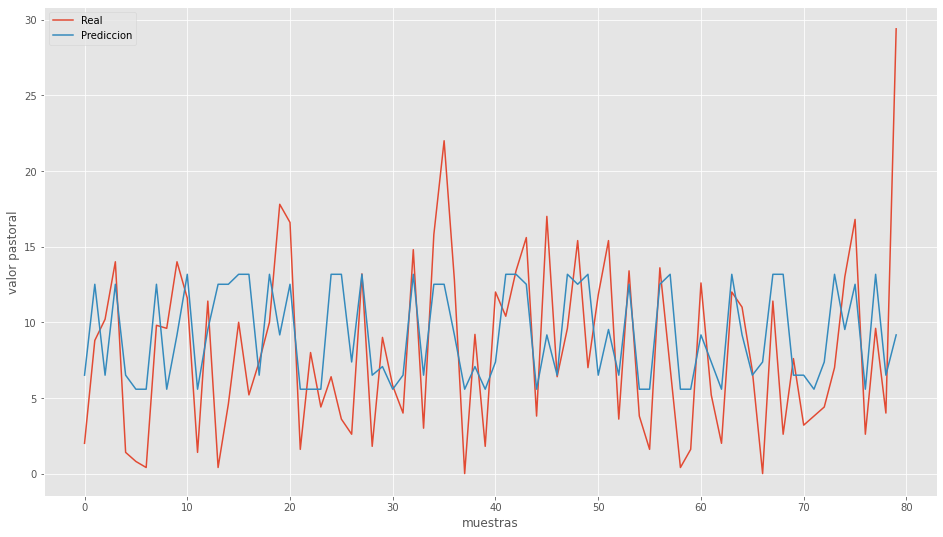

In [16]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(y_pred)),y_pred,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

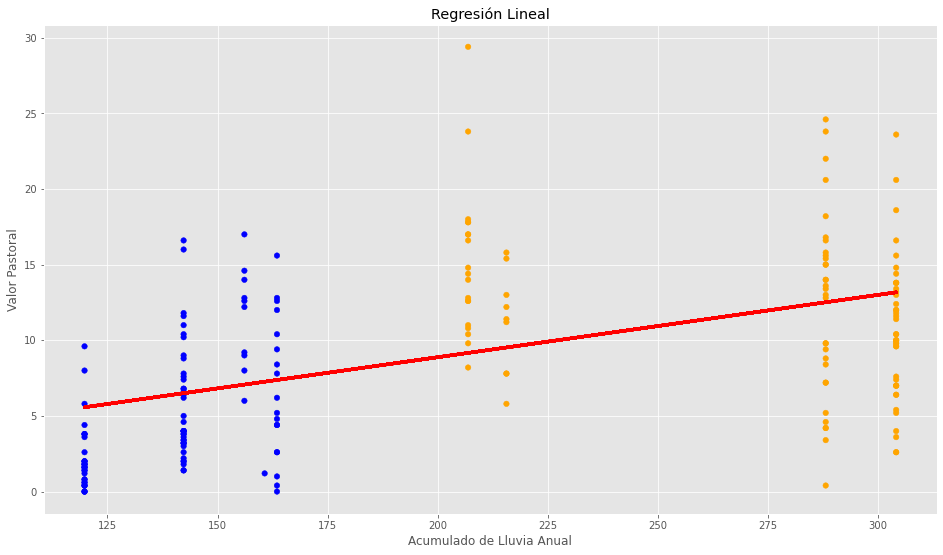

In [22]:
plt.scatter(X[:,0], y,  c=asignar, s=tamanios[0])
plt.plot(X_test[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Acumulado de Lluvia Anual')
plt.ylabel('Valor Pastoral')
plt.title('Regresión Lineal')

plt.show()

In [23]:
# Vamos a comprobar:
# Quiero predecir cuántos "valor pastoral" voy a obtener por un acumulado de lluvia de 200,
# según nuestro modelo, hacemos:
y_p = regr.predict([[200]])
print(round(float(y_p),2))

8.88


## Predecir el valor pastoral a partir de la lluvia acumulada en el verano

Vemos la forma de los datos

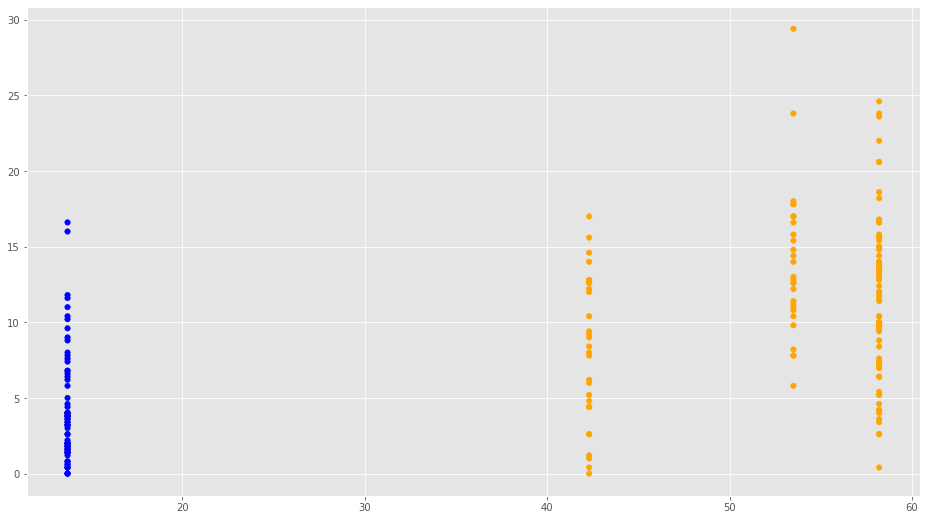

In [24]:
colores=['orange','blue']
tamanios=[30,60]

f1 = data['acum_verano'].values
f2 = data['fn_valor_pastoral'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de lluvia
asignar=[]
for index, row in data.iterrows():
    if(row['acum_verano']>39):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. 

## Creando el modelo

In [25]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["acum_verano"]]
X = np.array(dataX)
y = data['fn_valor_pastoral'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_test)

print('Precisión del modelo entrenamiento:')
print(str(round(regr.score(X_train, y_train),4))+'%')

print('Precisión del modelo test:')
print(str(round(regr.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, y_pred),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, y_pred),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, y_pred),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, y_pred),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, y_pred),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

Precisión del modelo entrenamiento:
0.3199%
Precisión del modelo test:
0.3695%
Varianza Explicada:
0.3715
MAE:
3.9169
MSE:
24.8809
RMSE:
4.9881
R2:
0.3695
Coefficients: 
 [0.16530004]
Independent term: 
 2.1279289121834797


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 0.16 y el término independiente “b” es 2.12. 

- La Varianza Explicada es de 0.3715, o sea 0.37. ¿Qué significa esto? Qué los datos están dispersos un 37%, y al tener un valor por debajo de 1.0, es una metrica baja.
- El Error medio absoluto (MAE) es de 3.9169, o sea 3.92. ¿Qué significa esto? Qué en promedio se equivoca 3.92 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.92 es medianamente aceptable. Y 3.92 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 24.8809, o sea 24.88. ¿Qué significa esto? Qué en promedio se equivoca 24.88 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 24.88 no es aceptable. Y 24.88 está lejos de 0, lo cual es malo por lo que este modelo no sera muy bueno.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 4.9881, o sea 4.98. ¿Qué significa esto? Qué en promedio se equivoca 4.98 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 4.98 es medianamente aceptable. Y 4.98 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.3695, o sea 0.37. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.37. Esto quiere decir que es un modelo cuyas estimaciones se ajustan poco a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 37% a la variable real, o que la calidad del modelo es del 37% o que el rendimiento del modelo es del 37%.

<br/>

- La Precisión del modelo en el entrenamiento es de 0.3199%, o sea 32%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.3695%, o sea 37%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 


**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

## Grafiquemos los resultados

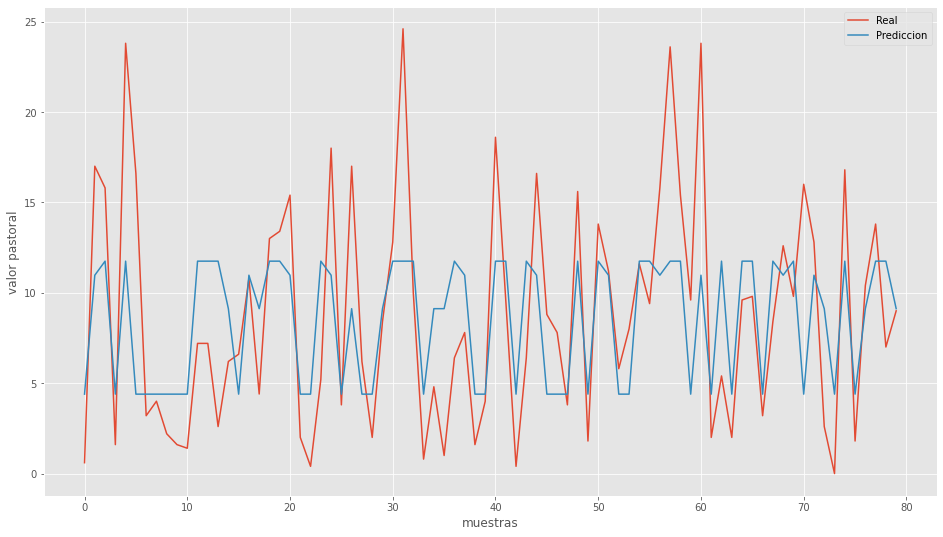

In [26]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(y_pred)),y_pred,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

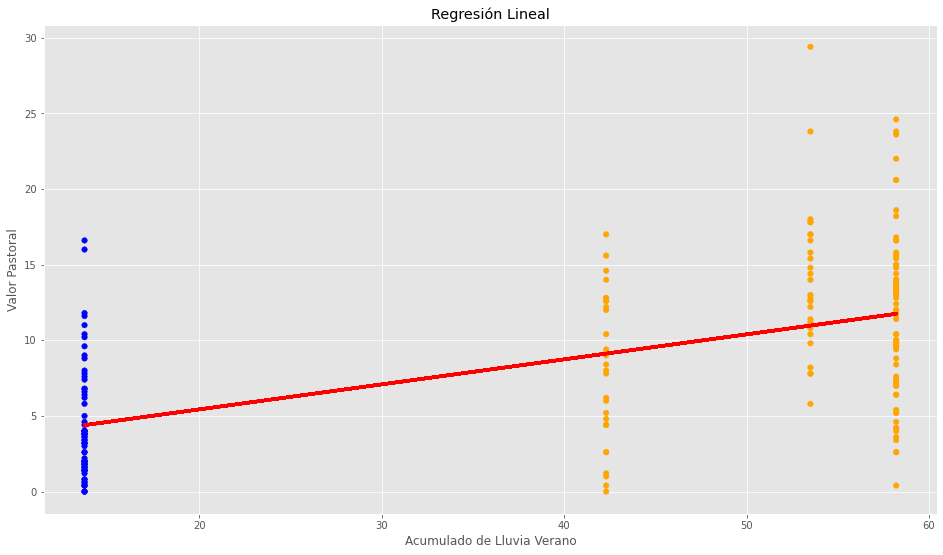

In [27]:
plt.scatter(X[:,0], y,  c=asignar, s=tamanios[0])
plt.plot(X_test[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Acumulado de Lluvia Verano')
plt.ylabel('Valor Pastoral')
plt.title('Regresión Lineal')

plt.show()

In [28]:
# Vamos a comprobar:
# Quiero predecir cuántos "valor pastoral" voy a obtener por un acumulado de lluvia en el verano de 50,
# según nuestro modelo, hacemos:
y_p = regr.predict([[50]])
print(round(float(y_p),2))

10.39


### CONCLUSIÓN 1: La regresión lineal no es el modelo para los datos segun yo. Quizas un k-means o k-nn que trabaje con agrupación por la forma que tienen los datos.

Hay que tener en cuenta que son solo 200 puntos y que solo estan relacionados con dos sondas (porque en gastre hay dos sondas del INTA pero no tienen nada de datos y tampoco tienen de los años que necesitamos)

# NUEVAS PRUEBAS

## Se agrupan los datos por cantidad de lluvias anual, y se intenta usar una regresion lineal para predecir el VP a partir del acumulado anual

### Leemos nuestro archivo de entrada

In [29]:
df = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
df

,feacha,codigo_gps,coordenada_completa,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,CG T01,-68.7056907/-43.291952,-43.291952,-68.705691,3.6,1.437643,2.597643,0.477643,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,CG T02,-68.6608421/-43.2535963,-43.253596,-68.660842,0.6,1.354438,2.514438,0.394438,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,CG T03,-68.616647/-43.2181445,-43.218145,-68.616647,1.6,1.274792,2.434792,0.314792,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,CG T04,-68.6180901/-43.1667136,-43.166714,-68.618090,8.0,1.224804,2.384804,0.264804,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,CG T05,-68.6390379/-43.1237455,-43.123745,-68.639038,4.4,1.202783,2.362783,0.242783,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,CT2 T21,-65.9446227/-42.6019474,-42.601947,-65.944623,15.4,2.013430,0.853430,2.973430,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,CT2 T22,-65.9904844/-42.577312,-42.577312,-65.990484,11.2,1.992204,0.832204,2.952204,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,CT2 T23,-66.0338334/-42.5443476,-42.544348,-66.033833,13.0,1.981819,0.821819,2.941819,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,CT2 T24,-66.082257/-42.5184357,-42.518436,-66.082257,11.4,1.959307,0.799307,2.919307,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


### Eliminamos las columnas que no nos interesan

In [30]:
df = df.drop(['codigo_gps', 'coordenada_completa', 'latitud','longitug', 'dist_laguna_fría','distancia_telsen','dist_gastre'], axis=1)
df

,feacha,fn_valor_pastoral,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,3.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,0.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,1.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,8.0,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,4.4,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,15.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,11.2,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,13.0,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,11.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


### Agrupamos por acumulado de lluvia anual

In [31]:
df = df.groupby(by='acum_anual',as_index=False).mean()
df

,acum_anual,fn_valor_pastoral,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,119.8,2.245161,13.7,14.3,2.6,8.5,14.2,53.7
1,142.3,5.865000,13.7,14.3,3.9,9.1,12.0,52.1
2,156.1,11.540000,42.3,19.8,7.2,13.6,5.1,48.6
3,160.7,1.200000,42.3,20.0,7.3,13.6,6.3,40.9
4,163.5,6.700000,42.3,20.0,7.3,13.6,6.3,40.9
5,206.9,15.200000,53.5,19.8,7.2,13.6,5.1,48.6
6,215.6,11.155556,53.5,19.8,7.2,13.6,5.1,48.6
7,288.1,12.348387,58.2,14.3,3.9,9.1,12.0,52.1
8,304.1,10.687805,58.2,14.3,3.9,9.1,12.0,52.1


Veamos que tan correlacionados estan los datos a partir del group by

<AxesSubplot:>

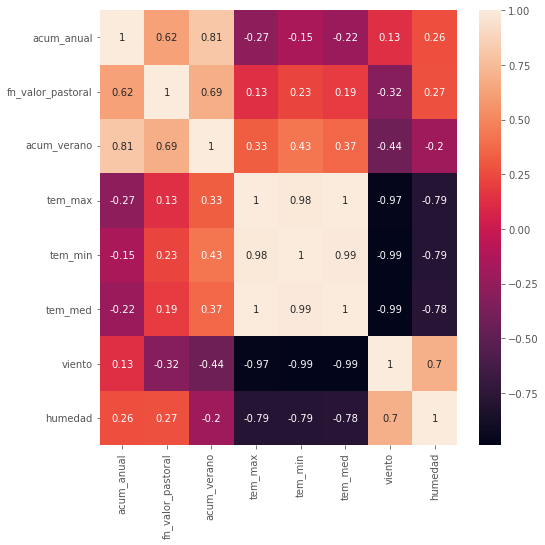

In [32]:
correlation_mat = df.corr()
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(correlation_mat, annot = True, ax = ax)

Según la matriz, el valor pastoral esta correlacionado en un 0.62 con la lluvia acumulada anual y 0.69 con la luvia acumulada en el verano. Y otras correlaciones mas bajan son 0.27 para humedad y 0.23 con temperatura minima. Hay una correlacion negativa de -0.32 para el viento.

Vemos la forma de los datos

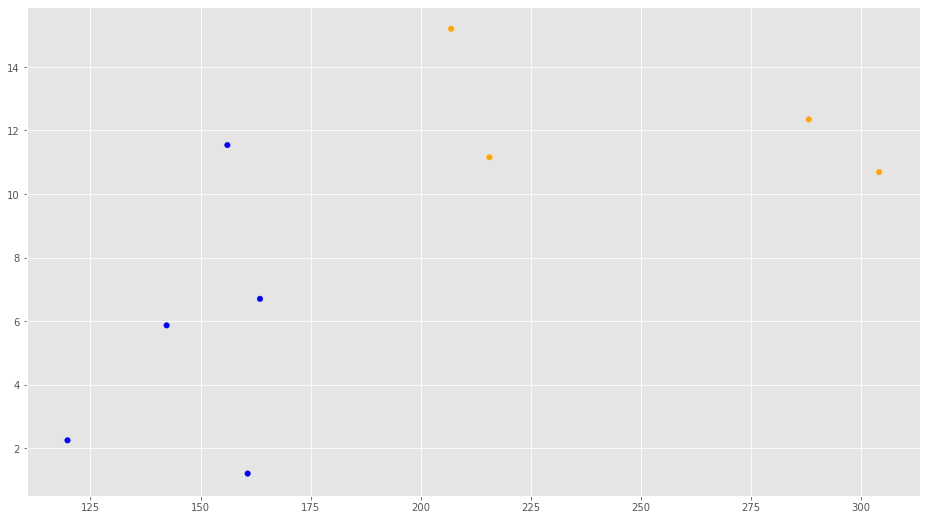

In [33]:
colores=['orange','blue']
tamanios=[30,60]

f1 = df['acum_anual'].values
f2 = df['fn_valor_pastoral'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de lluvia
asignar=[]
for index, row in df.iterrows():
    if(row['acum_anual']>206):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. 

## Creando el modelo

In [38]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =df[["acum_anual"]]
X = np.array(dataX)
y = df['fn_valor_pastoral'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_test)

print('Precisión del modelo entrenamiento:')
print(str(round(regr.score(X_train, y_train),4))+'%')

print('Precisión del modelo test:')
print(str(round(regr.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, y_pred),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, y_pred),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, y_pred),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, y_pred),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, y_pred),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

Precisión del modelo entrenamiento:
0.4495%
Precisión del modelo test:
0.264%
Varianza Explicada:
0.2979
MAE:
3.0477
MSE:
14.6022
RMSE:
3.8213
R2:
0.264
Coefficients: 
 [0.04673609]
Independent term: 
 -0.21088913806982035


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 0.04 y el término independiente “b” es 0.21. 

- La Varianza Explicada es de 0.2979, o sea 0.29. ¿Qué significa esto? Qué los datos están dispersos un 29%, y al tener un valor por debajo de 1.0, es una metrica baja.
- El Error medio absoluto (MAE) es de 3.0477, o sea 3.05. ¿Qué significa esto? Qué en promedio se equivoca 3.05 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.05 es medianamente aceptable. Y 3.05 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 14.6022, o sea 14.60. ¿Qué significa esto? Qué en promedio se equivoca 14.60 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 14.60 no es aceptable. Y 14.60 está lejos de 0, lo cual es malo por lo que este modelo no sera muy bueno.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 3.8213, o sea 3.82. ¿Qué significa esto? Qué en promedio se equivoca 3.82 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.82 es medianamente aceptable. Y 3.82 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.264, o sea 0.26. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.26. Esto quiere decir que es un modelo cuyas estimaciones se ajustan poco a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 26% a la variable real, o que la calidad del modelo es del 26% o que el rendimiento del modelo es del 26%.

<br/>

- La Precisión del modelo en el entrenamiento es de 0.4495%, o sea 45%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.264%, o sea 26%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 


**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

## Grafiquemos los resultados

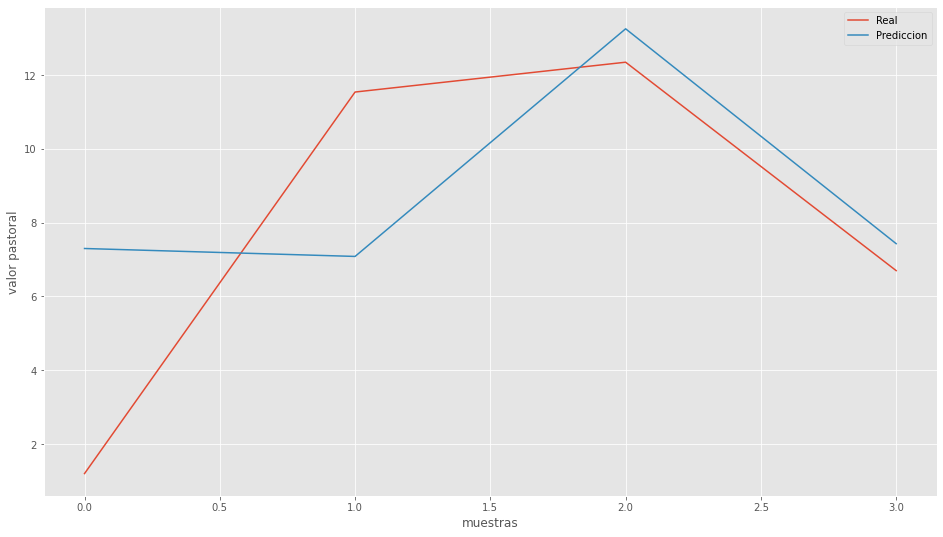

In [39]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(y_pred)),y_pred,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

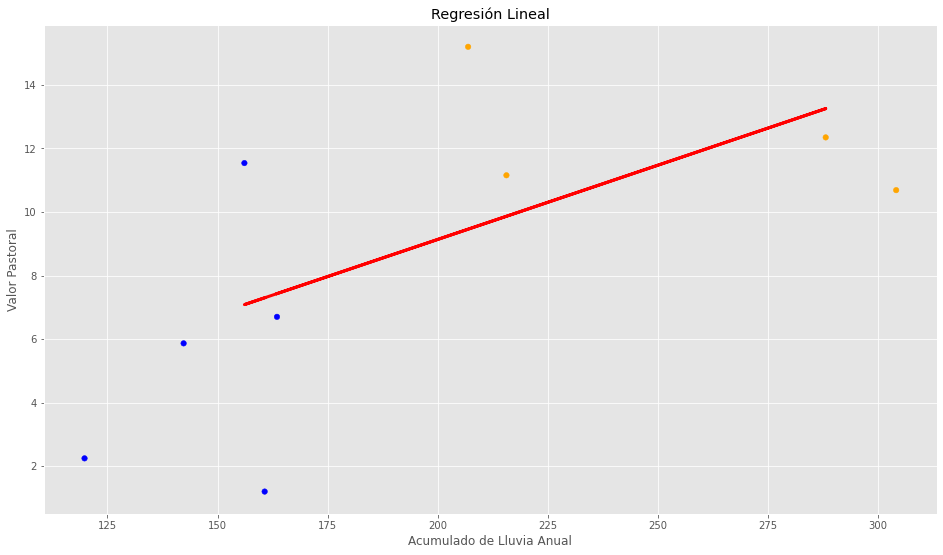

In [42]:
plt.scatter(X[:,0], y,  c=asignar, s=tamanios[0])
plt.plot(X_test[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Acumulado de Lluvia Anual')
plt.ylabel('Valor Pastoral')
plt.title('Regresión Lineal')

plt.show()

In [43]:
# Vamos a comprobar:
# Quiero predecir cuántos "valor pastoral" voy a obtener por un acumulado de lluvia en el verano de 50,
# según nuestro modelo, hacemos:
y_p = regr.predict([[119.8]])
print(round(float(y_p),2))

5.39


## Se agrupan los datos por cantidad de lluvias anual, y se intenta usar una regresion lineal para predecir el VP a partir del acumulado en verano

### Leemos nuestro archivo de entrada

In [44]:
df = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
df

,feacha,codigo_gps,coordenada_completa,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,CG T01,-68.7056907/-43.291952,-43.291952,-68.705691,3.6,1.437643,2.597643,0.477643,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,CG T02,-68.6608421/-43.2535963,-43.253596,-68.660842,0.6,1.354438,2.514438,0.394438,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,CG T03,-68.616647/-43.2181445,-43.218145,-68.616647,1.6,1.274792,2.434792,0.314792,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,CG T04,-68.6180901/-43.1667136,-43.166714,-68.618090,8.0,1.224804,2.384804,0.264804,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,CG T05,-68.6390379/-43.1237455,-43.123745,-68.639038,4.4,1.202783,2.362783,0.242783,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,CT2 T21,-65.9446227/-42.6019474,-42.601947,-65.944623,15.4,2.013430,0.853430,2.973430,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,CT2 T22,-65.9904844/-42.577312,-42.577312,-65.990484,11.2,1.992204,0.832204,2.952204,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,CT2 T23,-66.0338334/-42.5443476,-42.544348,-66.033833,13.0,1.981819,0.821819,2.941819,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,CT2 T24,-66.082257/-42.5184357,-42.518436,-66.082257,11.4,1.959307,0.799307,2.919307,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


### Eliminamos las columnas que no nos interesan

In [45]:
df = df.drop(['codigo_gps', 'coordenada_completa', 'latitud','longitug', 'dist_laguna_fría','distancia_telsen','dist_gastre'], axis=1)
df

,feacha,fn_valor_pastoral,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,3.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,0.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,1.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,8.0,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,4.4,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,15.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,11.2,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,13.0,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,11.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


### Agrupamos por acumulado de lluvia anual

In [46]:
df = df.groupby(by='acum_anual',as_index=False).mean()
df

,acum_anual,fn_valor_pastoral,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,119.8,2.245161,13.7,14.3,2.6,8.5,14.2,53.7
1,142.3,5.865000,13.7,14.3,3.9,9.1,12.0,52.1
2,156.1,11.540000,42.3,19.8,7.2,13.6,5.1,48.6
3,160.7,1.200000,42.3,20.0,7.3,13.6,6.3,40.9
4,163.5,6.700000,42.3,20.0,7.3,13.6,6.3,40.9
5,206.9,15.200000,53.5,19.8,7.2,13.6,5.1,48.6
6,215.6,11.155556,53.5,19.8,7.2,13.6,5.1,48.6
7,288.1,12.348387,58.2,14.3,3.9,9.1,12.0,52.1
8,304.1,10.687805,58.2,14.3,3.9,9.1,12.0,52.1


Veamos que tan correlacionados estan los datos a partir del group by

<AxesSubplot:>

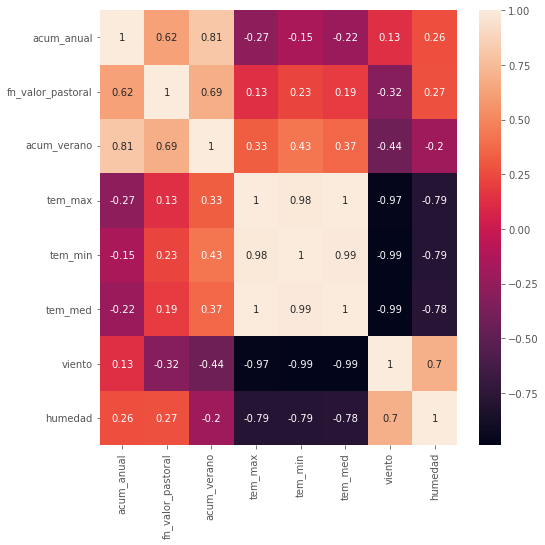

In [47]:
correlation_mat = df.corr()
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(correlation_mat, annot = True, ax = ax)

Según la matriz, el valor pastoral esta correlacionado en un 0.62 con la lluvia acumulada anual y 0.69 con la luvia acumulada en el verano. Y otras correlaciones mas bajan son 0.27 para humedad y 0.23 con temperatura minima. Hay una correlacion negativa de -0.32 para el viento.

Vemos la forma de los datos

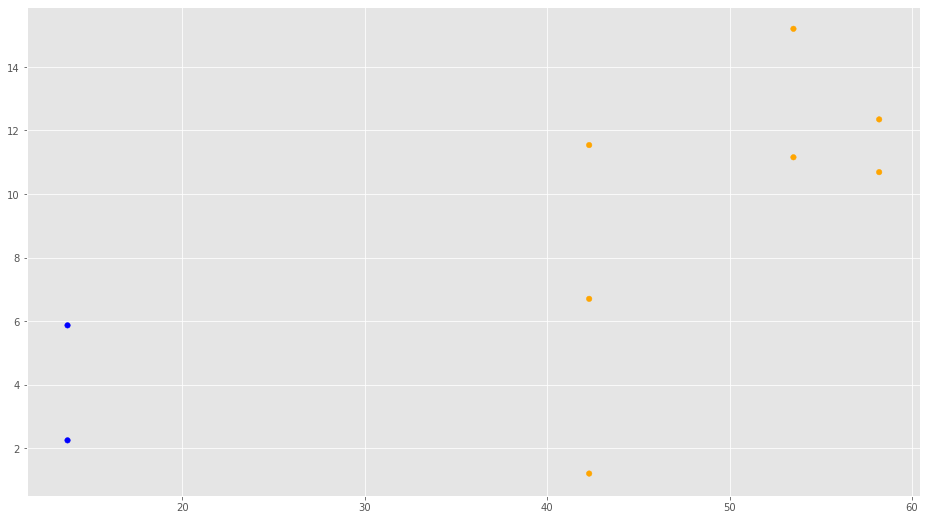

In [48]:
colores=['orange','blue']
tamanios=[30,60]

f1 = df['acum_verano'].values
f2 = df['fn_valor_pastoral'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de lluvia
asignar=[]
for index, row in df.iterrows():
    if(row['acum_verano']>26):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. 

### Creando el modelo

In [50]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =df[["acum_verano"]]
X = np.array(dataX)
y = df['fn_valor_pastoral'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_test)

print('Precisión del modelo entrenamiento:')
print(str(round(regr.score(X_train, y_train),4))+'%')

print('Precisión del modelo test:')
print(str(round(regr.score(X_test, y_test),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, y_pred),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, y_pred),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, y_pred),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test, y_pred),4)),4)))
print('R2:')
print(str(round(r2_score(y_test, y_pred),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

Precisión del modelo entrenamiento:
0.1223%
Precisión del modelo test:
0.2317%
Varianza Explicada:
0.518
MAE:
3.8932
MSE:
18.0174
RMSE:
4.2447
R2:
0.2317
Coefficients: 
 [0.09014708]
Independent term: 
 3.6143131664554202


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 0.09 y el término independiente “b” es 3.61. 

- La Varianza Explicada es de 0.518, o sea 0.51. ¿Qué significa esto? Qué los datos están dispersos un 51%, y al tener un valor por debajo de 1.0, es una metrica baja.
- El Error medio absoluto (MAE) es de 3.8932, o sea 3.89. ¿Qué significa esto? Qué en promedio se equivoca 3.89 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 3.89 es medianamente aceptable. Y 3.89 está bastante cerca de 0, lo cual es bueno.
- Error cuadrático medio (MSE) es de 18.0174, o sea 18.01. ¿Qué significa esto? Qué en promedio se equivoca 18.01 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 18.01 no es aceptable. Y 18.01 está lejos de 0, lo cual es malo por lo que este modelo no sera muy bueno.
- La Raíz cuadrada del Error cuadrático medio (RMSE) es de 4.2447, o sea 4.24. ¿Qué significa esto? Qué en promedio se equivoca 4.24 unidades en el valor real del VP de un punto. Considerando que el valor pastoral medido en las muestras va de 0.0 a 29.40, entonces 4.24 es medianamente aceptable. Y 4.24 está bastante cerca de 0, lo cual es bueno.
- El coeficiente de determinación (R2) es de 0.231, o sea 0.23. ¿Qué significa esto? Qué el ajuste, según el cálculo del R cuadrado, es de 0.23. Esto quiere decir que es un modelo cuyas estimaciones se ajustan poco a la variable real. Aunque técnicamente no sería correcto, podríamos decir algo así como que el modelo explica en un 23% a la variable real, o que la calidad del modelo es del 23% o que el rendimiento del modelo es del 23%.

<br/>

- La Precisión del modelo en el entrenamiento es de 0.1223%, o sea 12%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 
- La Precisión del modelo en el test es de 0.231%, o sea 23%. ¿Qué significa esto? No sé, porque no compara los valores observados con los predichos como las otras metricas. 


**La funcion score() para datos de test y r2_score, dan el mismo resultado. Lo cual coincide con lo que dijo Anele, ambos serian el coeficiente de determinacion.**

*Pero la funcion score() para datos de train, que es como la tome del ejemplo original de regresión multiple (predecir lana a partir de lluvia del dique y cantidad de animales), no sé que signifique.*

CONCLUSIÓN: La palabra precisión no es la correcta me parece

### Grafiquemos los resultados

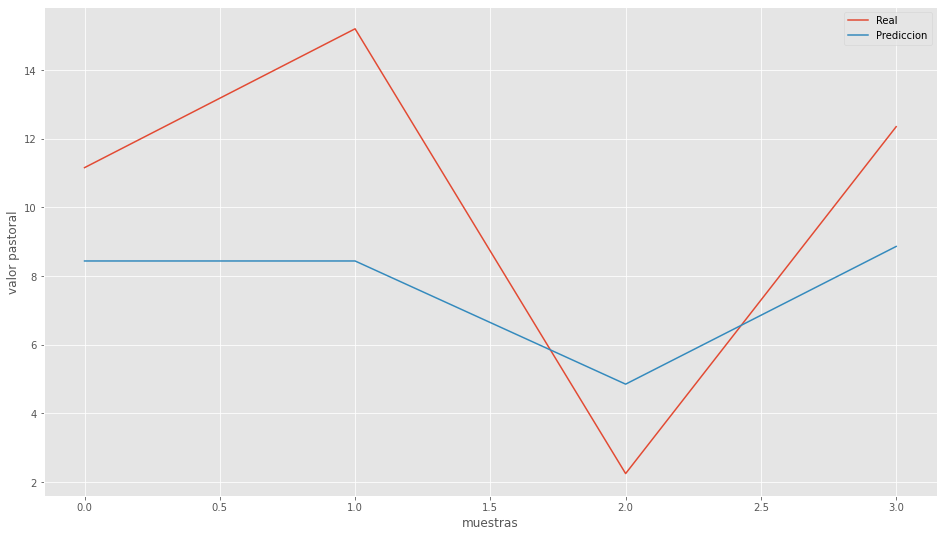

In [51]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(y_pred)),y_pred,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

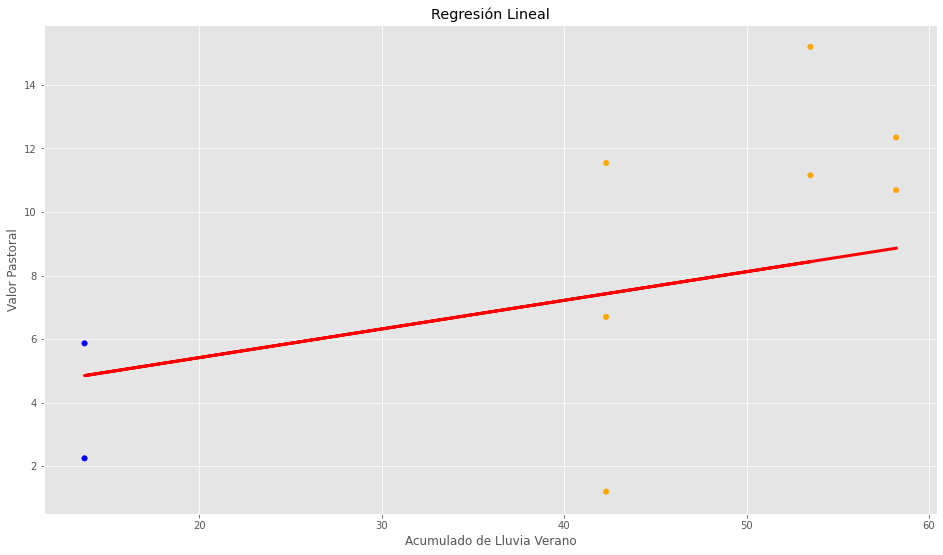

In [54]:
plt.scatter(X[:,0], y,  c=asignar, s=tamanios[0])
plt.plot(X_test[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Acumulado de Lluvia Verano')
plt.ylabel('Valor Pastoral')
plt.title('Regresión Lineal')

plt.show()

### Comparar las 4 pruebas

In [55]:
tabla = pd.DataFrame(columns=['modelo', 'VE', 'MAE', 'MSE', 'RMSE','R2'],index=range(4))
tabla.iloc[0] = ('prediccion1',0.26,4.02,25.55,5.05,0.24)
tabla.iloc[1] = ('prediccion2',0.37,3.92,24.88,4.98,0.37)
tabla.iloc[2] = ('prediccion3',0.29,3.05,14.60,3.82,0.26)
tabla.iloc[3] = ('prediccion4',0.51,3.89,18.01,4.24,0.23)
tabla

,modelo,VE,MAE,MSE,RMSE,R2
0,prediccion1,0.26,4.02,25.55,5.05,0.24
1,prediccion2,0.37,3.92,24.88,4.98,0.37
2,prediccion3,0.29,3.05,14.6,3.82,0.26
3,prediccion4,0.51,3.89,18.01,4.24,0.23


Si consideramos las metricas MAE Y RMSE como las mas significativas, el mejor modelo es el de la prediccion 3.

Si consideramos la VE como la importante entonces el mejor modelo es el de la prediccion 4.

Si consideramos el R2 como el mas significativo, el modelo de la prediccion 2 es el mejor.

Según diferentes lecturas el MSE y el R2 son las mas utilizadas para regresión, y si miramos las metricas de los modelos el valor de MSE en ninguno esta cerca de 0 y el valor de R2 en ninguno esta cerca de 1, lo cual indica que ninguno funciona bien.

## CONCLUSIóN 2 es quizas pueden mejorar las metricas usando una regresion lineal multiple

Links donde hablan de las metricas y porque no usar R2 para Regresion múltiple. 

https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/ 

https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html 

https://economipedia.com/definiciones/r-cuadrado-coeficiente-determinacion.html 